In [1]:
from konlpy.tag import Okt
twitter=Okt()
word_list=twitter.pos('아버지가 방에 들어가신다.',norm=True, stem=True)
print(word_list)

[('아버지', 'Noun'), ('가', 'Josa'), ('방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb'), ('.', 'Punctuation')]


In [4]:
from gensim.models import word2vec
import codecs
from konlpy.tag import Okt
f=open("c:/data/text/ratings_all.csv",encoding="ms949")
data=f.read()
twitter=Okt()
lines=data.split("\n")
results=[]
print(len(lines))
for line in lines[:1000]:
    print(line[:10])
    r=[]
    word_list=twitter.pos(line,norm=True,stem=True)
    for (word, pumsa) in word_list:
        if not pumsa in ["Josa","Eomi","Punctuation"]:
            r.append(word)
    results.append((" ".join(r)).strip())
output=(" ".join(results)).strip()
with open("c:/data/text/text_prepared.dat","w",encoding="utf-8") as fp:
    fp.write(output)
print("작업 완료")

200002
document,l
아 더빙.. 진짜 
흠...포스터보고 
너무재밓었다그래서보
교도소 이야기구먼 
사이몬페그의 익살스
막 걸음마 뗀 3세
원작의 긴장감을 제
별 반개도 아깝다 
액션이 없는데도 재
왜케 평점이 낮은건
걍인피니트가짱이다.
볼때마다 눈물나서 
울면서 손들고 횡단
담백하고 깔끔해서 
취향은 존중한다지만
ㄱ냥 매번 긴장되고
참 사람들 웃긴게 
굿바이 레닌 표절인
이건 정말 깨알 캐
"약탈자를 위한 변
나름 심오한 뜻도 
보면서 웃지 않는 
"재미없다 지루하고
절대 평범한 영화가
주제는 좋은데 중반
다 짤랐을꺼야. 그
kl2g 고추를 털
카밀라벨 발연기,0
재밋는뎅,1
센스있는 연출력..
엄포스의 위력을 다
졸쓰레기 진부하고말
재밌는데 별점이 왜
1%라도 기대했던 
아직도 이 드라마는
패션에 대한 열정!
키이라 나이틀리가 
허허...원작가 정
포스터는 있어보이는
이 영화가 왜 이렇
단순하면서 은은한 
'다 알바생인가 내
오게두어라! 서리한
정말 맘에 들어요.
윤제문이라는 멋진 
평점에속지마시길시간
리얼리티가 뛰어나긴
마이너스는 왜없냐 
난 우리영화를 사랑
"데너리스 타르 가
영화가 사람의 영혼
야 세르게이! 작은
이렇게 가슴시리게 
"난또 저 꼬마애가
재미있어요,1
전 좋아요,1
최고,0
너무 충격적이엇다.
심심한영화.,0
백봉기 언제나오나요
보는내내 그대로 들
불알이 나와서 당황
평범함속에 녹아든 
보던거라 계속보고있
"사랑하고싶게하는,
"많은 사람들이 이
"예전 작품 캐릭터
김남길의 백점짜리 
재밌네 비슷한 영화
노래실력으로뽑는게 
아 일본영화 다이런
이틀만에 다 봤어요
졸작,0
재밋네요 달팽이가 
어설픈 전개 어이없
부패한 로마노프 왕
내용전개는 무난한 
매우 실망.....
한국영화 흥행코드:
아햏햏 아햏햏 아햏
뭐냐..시작하고 3
단연 최고라고 할수
"감독이 럼먹고 영
이건 뭐냐? 우뢰매
정말쓰레기영화입니다
진정 위대한 영화 
별루 였다..,0
내일이 기대되는 `
근데 조미가 막문위
ㅋㅋㅋ 진짜 골깜.
성룡영화중 최악인듯
골때리네ㅋㅋ

In [5]:
data=word2vec.LineSentence("c:/data/text/text_prepared.dat")
model=word2vec.Word2Vec(data, vector_size=100,window=10,hs=1,min_count=2, sg=1)
model.save("c:/data/text/text_100.model")
print("word2vec 모델 생성 완료")

word2vec 모델 생성 완료


In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text=open("c:/data/text/ratings_all.csv",encoding="ms949").read()
wordcloud=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf").generate(text)
wordcloud.words_
print("wordcloud 생성 완료")

wordcloud 생성 완료


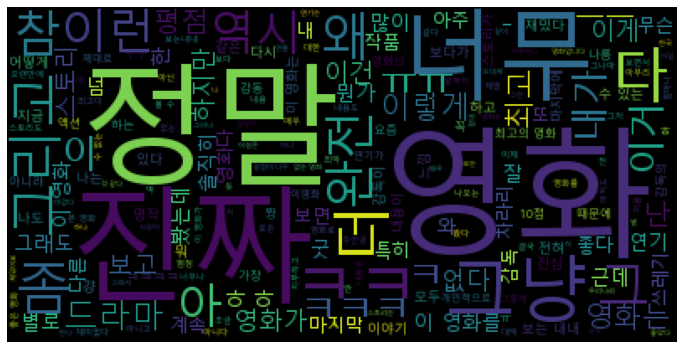

In [8]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [9]:
model=word2vec.Word2Vec.load("c:/data/text/text_100.model")
print(model.wv.most_similar(positive=["영화"])) 
print(model.wv.most_similar(positive=["드라마"]))
print(model.wv.similarity("영화","드라마"))
print(model.wv.doesnt_match("영화 드라마 이야기 완전".split ()))

[('기대', 0.9699013829231262), ('명작', 0.9640443921089172), ('절대', 0.9553917050361633), ('편이', 0.9543308615684509), ('ㅋ', 0.9535024166107178), ('1', 0.9531983733177185), ('듯', 0.9527241587638855), ('점수', 0.9525365233421326), ('ㅋㅋ', 0.9516847729682922), ('번', 0.951676607131958)]
[('드', 0.9694293141365051), ('씨', 0.9691063761711121), ('버리다', 0.9678181409835815), ('댓글', 0.9657714366912842), ('짱짱', 0.9656174778938293), ('잊다', 0.9645594358444214), ('극', 0.964300274848938), ('바', 0.9642246961593628), ('망치', 0.9642005562782288), ('내다', 0.9641145467758179)]
0.90043926
영화
